In [47]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
import numpy as np
import pandas as pd

# data visuzlization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [49]:
# max columns
pd.set_option('display.max_columns', None)
# max rows
pd.set_option('display.max_rows', None)

In [50]:
df = pd.read_csv('/content/drive/My Drive/Project/Project 5/dataset_diabetes/Targ.csv')
df.replace('?',np.nan,inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,Target
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,NO,No Drugs
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,Ch,Yes,>30,Only insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,Yes,NO,Other Drugs
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,NO,Only insulin
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,NO,Combination of Drugs


In [51]:
df.shape

(101766, 28)

In [52]:
m=pd.DataFrame({'Number of Missing':df.isnull().sum() , 'Missing Percentage':np.round(df.isnull().sum()*100/len(df),1)})
m=m[m['Missing Percentage']>0]
m

,Number of Missing,Missing Percentage
race,2273,2.2
weight,98569,96.9
payer_code,40256,39.6
medical_specialty,49949,49.1
diag_2,358,0.4
diag_3,1423,1.4


In [53]:
#dropping columns with high NA percentage
df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
# dropping columns related to IDs
df.drop(['encounter_id','patient_nbr','admission_type_id',
         'discharge_disposition_id','admission_source_id'],axis=1,inplace=True)
#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']


In [54]:
# dropping rows with NAs.
df.dropna(inplace=True)

In [55]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,Target
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,None,Ch,Yes,>30,Only insulin
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,None,No,Yes,NO,Other Drugs
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,NO,Only insulin
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,NO,Combination of Drugs
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,414,411,250,9,None,None,No,Yes,>30,Only insulin


In [56]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    #print(condition)
    df.loc[condition,col] = '250'
    #print(df.loc[condition,col])
    print(df[col].value_counts().T)

250     7965
428     6730
414     6373
786     3900
410     3514
486     3412
427     2701
491     2210
715     2073
434     1983
780     1976
682     1966
996     1926
276     1831
38      1642
599     1557
584     1496
-57     1179
518     1092
820     1034
577     1017
493     1010
435      987
562      957
574      937
560      850
296      842
440      817
433      768
998      752
722      703
578      643
507      595
789      545
453      530
530      521
8        500
403      497
402      445
535      445
415      436
295      428
162      419
458      418
724      417
997      414
285      362
733      352
278      343
401      336
592      332
482      331
558      330
590      326
197      314
280      311
153      305
824      300
569      281
426      278
571      269
531      268
511      264
787      259
404      258
648      255
707      250
411      238
198      236
572      235
466      232
552      226
-58      223
730      222
812      220
532      213
575      210

In [57]:
df[diag_cols] = df[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)
    
df.dropna(inplace=True)

In [58]:
df['age']=df['age'].replace({'[0-10)':'child','[10-20)':'child','[20-30)':'adult','[30-40)':'adult','[40-50)':'adult','[50-60)':'adult'
                   ,'[60-70)':'Seniors','[70-80)':'Seniors','[80-90)':'Seniors','[90-100)':'Seniors'})

In [59]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,Target
1,Caucasian,Female,child,3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,Ch,Yes,>30,Only insulin
2,AfricanAmerican,Female,adult,2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,No,Yes,NO,Other Drugs
3,Caucasian,Male,adult,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,Ch,Yes,NO,Only insulin
4,Caucasian,Male,adult,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,Ch,Yes,NO,Combination of Drugs
5,Caucasian,Male,adult,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,Yes,>30,Only insulin


In [60]:
df['A1Cresult'] = df['A1Cresult'].replace({'>7':'Not Normal', '>8':'Not Normal'})

In [61]:
set(df['A1Cresult'])

{'None', 'Norm', 'Not Normal'}

In [62]:
df['readmitted'] = df['readmitted'].replace({'<30':'Yes', '>30':'Yes'})

In [63]:
set(df['readmitted'])

{'NO', 'Yes'}

In [64]:
set(df['Target'])

{'Combination of Drugs', 'No Drugs', 'Only insulin', 'Other Drugs'}

In [65]:
df = df[(df['Target']=='Only insulin') | ((df['Target']=='Combination of Drugs'))]

In [66]:
set(df['Target'])

{'Combination of Drugs', 'Only insulin'}

In [67]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'change', 'diabetesMed', 'readmitted', 'Target'],
      dtype='object')

In [68]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [69]:
for i in cat_cols:
  c = pd.crosstab(df['Target'],df[i])
  print(c)
  print('**'*20)

race                  AfricanAmerican  Asian  Caucasian  Hispanic  Other
Target                                                                  
Combination of Drugs             4250    136      17249       491    393
Only insulin                     6711    163      21641       583    493
****************************************
gender                Female   Male
Target                             
Combination of Drugs   11868  10651
Only insulin           16202  13389
****************************************
age                   Seniors  adult  child
Target                                     
Combination of Drugs    15494   6997     28
Only insulin            18489  10706    396
****************************************
diag_1                Circulatory  Diabetes  Digestive  Genitourinary  Injury  \
Target                                                                          
Combination of Drugs         7016      1844       1436           1011    1577   
Only insulin          

In [70]:
df = df.drop('diabetesMed',axis=1)

In [71]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'change', 'readmitted', 'Target'],
      dtype='object')

In [72]:
for i in cat_cols:
  c = pd.crosstab(df['Target'],df[i])
  print(i)
  p = st.chi2_contingency(c)
  print(p[1]>0.05)
  print('**'*20)

race
False
****************************************
gender
False
****************************************
age
False
****************************************
diag_1
False
****************************************
diag_2
False
****************************************
diag_3
False
****************************************
max_glu_serum
False
****************************************
A1Cresult
False
****************************************
change
False
****************************************
readmitted
False
****************************************
Target
False
****************************************


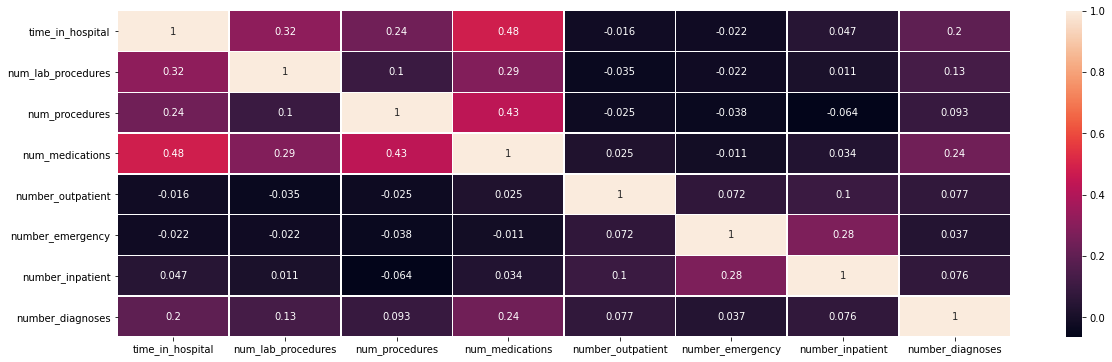

In [73]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

In [74]:
y = df['Target']
x = df.drop('Target',axis =1 )

In [75]:
x.shape

(52110, 18)

In [76]:
y.shape

(52110,)

In [77]:
x = pd.get_dummies(x,drop_first=True)

In [78]:
x.shape

(52110, 46)

In [79]:
y.value_counts(True)*100

Only insulin            56.785646
Combination of Drugs    43.214354
Name: Target, dtype: float64

In [84]:
y = y.replace({'Only insulin':1,'Combination of Drugs':0})

In [85]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model= sm.Logit(y,xc, random_state=3).fit()
model.summary()

         Current function value: 0.442462
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                52110
Model:                          Logit   Df Residuals:                    52063
Method:                           MLE   Df Model:                           46
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                  0.3530
Time:                        16:57:18   Log-Likelihood:                -23057.
converged:                      False   LL-Null:                       -35639.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3228      0.107    -12.352      0.000      -1.533      -1.113
time_in_hospital           0.0003      0.004      0.077      0.939      -0.008       0.009
num_lab_procedures         0.0068      0.001     10.219      0.000       0.005       0.008
num_procedures             0.0364      0.008      4.784      0.000       0.021       0.051
num_medications           -0.0113      0.002     -6.637      0.000      -0.015      -0.008
number_outpatient          0.0608      0.009      7.110      0.000       0.044       0.078
number_emergency           0.0358      0.012      2.964      0.003       0.012       0.059
number_inpatient           0.1796      0.009     19.522      0.000       0.162       0.198
number_diagnoses           0.1081      0.007     14.696      0.000       0.094       0.122
race_Asian                -0.0824      0.147     -0.559      0.576      -0.371       0.206
race_Caucasian            -0.1213      0.029     -4.211      0.000      -0.178      -0.065
race_Hispanic             -0.2279      0.081     -2.814      0.005      -0.387      -0.069
race_Other                 0.1028      0.084      1.229      0.219      -0.061       0.267
gender_Male               -0.0643      0.023     -2.841      0.004      -0.109      -0.020
age_adult                  0.2716      0.025     10.687      0.000       0.222       0.321
age_child                  2.3780      0.207     11.481      0.000       1.972       2.784
diag_1_Diabetes            0.8397      0.043     19.343      0.000       0.755       0.925
diag_1_Digestive           0.3515      0.048      7.362      0.000       0.258       0.445
diag_1_Genitourinary       0.3402      0.054      6.329      0.000       0.235       0.446
diag_1_Injury              0.1610      0.049      3.319      0.001       0.066       0.256
diag_1_Muscoloskeletal    -0.4564      0.067     -6.863      0.000      -0.587      -0.326
diag_1_Neoplasms          -0.0274      0.074     -0.372      0.710      -0.172       0.117
diag_1_Others              0.1042      0.036      2.870      0.004       0.033       0.175
diag_1_Respiratory        -0.0108      0.037     -0.288      0.773      -0.084       0.063
diag_2_Diabetes            0.2786      0.040      6.929      0.000       0.200       0.357
diag_2_Digestive           0.2203      0.064      3.427      0.001       0.094       0.346
diag_2_Genitourinary       0.2157      0.043      5.025      0.000       0.132       0.300
diag_2_Injury             -0.1394      0.079     -1.766      0.077      -0.294       0.015
diag_2_Muscoloskeletal    -0.1229      0.093     -1.325      0.185      -0.305       0.059
diag_2_Neoplasms          -0.1950      0.087     -2.231      0.026      -0.366      -0.024
diag_2_Others           7.112e-05      0.032      0.002      0.998      -0.063       0.063
diag_2_Respiratory        -0.0618      0.040     -1.544      0.122      -0.140       0.017
diag_3_Diabetes            0.1393      0.036      3.817 

In [97]:
from statsmodels.stats.outliers_influence \
  import variance_inflation_factor as vif

pd.DataFrame(  [vif(xc.values, i) for i in range(xc.shape[1])]   ,\
             index=xc.columns, columns=['vif']  )

,vif
const,95.539131
time_in_hospital,1.458854
num_lab_procedures,1.354276
num_procedures,1.415038
num_medications,1.777478
number_outpatient,1.031501
number_emergency,1.104736
number_inpatient,1.162229
number_diagnoses,1.291218
race_Asian,1.024974


In [86]:
cols=list(xc.columns)
while len(cols)>1:
    x_1= xc[cols]
    model=sm.Logit(y,x_1, random_state=3).fit()
    p=model.pvalues
    max_p= max(p)
    feature_maxp= p.idxmax()
    
    if max_p>0.05:
        print('\n')
        print('column removed: ', feature_maxp, 'prob: ', max_p)
        cols.remove(feature_maxp)
    else:
        break
        
cols

         Current function value: 0.442462
         Iterations: 35


column removed:  diag_2_Others prob:  0.9982245402409688


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.442462
         Iterations: 35


column removed:  change_No prob:  0.9933358035201384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.650275
         Iterations 7


column removed:  readmitted_Yes prob:  0.9494153097463521
Optimization terminated successfully.
         Current function value: 0.650275
         Iterations 7


column removed:  diag_1_Neoplasms prob:  0.9411770151484524
Optimization terminated successfully.
         Current function value: 0.650275
         Iterations 7


column removed:  max_glu_serum_>300 prob:  0.9370009646790248
Optimization terminated successfully.
         Current function value: 0.650275
         Iterations 7


column removed:  diag_3_Respiratory prob:  0.7817991982945927
Optimization terminated successfully.
         Current function value: 0.650276
         Iterations 7


column removed:  number_emergency prob:  0.6826304224128072
Optimization terminated successfully.
         Current function value: 0.650278
         Iterations 7


column removed:  diag_3_Diabetes prob:  0.5450914764353403
Optimization te

['const',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male',
 'age_adult',
 'age_child',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Genitourinary',
 'diag_1_Muscoloskeletal',
 'diag_1_Respiratory',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_None',
 'A1Cresult_Norm',
 'A1Cresult_Not Normal']

In [88]:
cols

['const',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male',
 'age_adult',
 'age_child',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Genitourinary',
 'diag_1_Muscoloskeletal',
 'diag_1_Respiratory',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_None',
 'A1Cresult_Norm',
 'A1Cresult_Not Normal']

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                52110
Model:                          Logit   Df Residuals:                    52082
Method:                           MLE   Df Model:                           27
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                 0.04886
Time:                        17:01:55   Log-Likelihood:                -33897.
converged:                       True   LL-Null:                       -35639.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4835      0.064      7.519      0.000       0.357       0.609
num_lab_procedures         0.0063      0.001     12.015      0.000       0.005       0.007
num_procedures             0.0866      0.006     14.338      0.000       0.075       0.098
num_medications           -0.0419      0.001    -31.610      0.000      -0.045      -0.039
number_outpatient          0.0314      0.007      4.252      0.000       0.017       0.046
number_inpatient           0.1623      0.008     20.932      0.000       0.147       0.177
number_diagnoses           0.0674      0.006     11.874      0.000       0.056       0.079
race_Asian                -0.2555      0.121     -2.103      0.035      -0.494      -0.017
race_Caucasian            -0.1541      0.023     -6.579      0.000      -0.200      -0.108
race_Hispanic             -0.3363      0.067     -5.053      0.000      -0.467      -0.206
race_Other                -0.2046      0.073     -2.813      0.005      -0.347      -0.062
gender_Male               -0.1004      0.019     -5.423      0.000      -0.137      -0.064
age_adult                  0.2053      0.021     10.013      0.000       0.165       0.246
age_child                  2.3087      0.198     11.651      0.000       1.920       2.697
diag_1_Diabetes            0.4526      0.033     13.739      0.000       0.388       0.517
diag_1_Digestive           0.4781      0.035     13.474      0.000       0.409       0.548
diag_1_Genitourinary       0.2092      0.043      4.904      0.000       0.126       0.293
diag_1_Muscoloskeletal    -0.4763      0.049     -9.678      0.000      -0.573      -0.380
diag_1_Respiratory        -0.0764      0.027     -2.838      0.005      -0.129      -0.024
diag_2_Diabetes            0.1208      0.029      4.176      0.000       0.064       0.178
diag_2_Digestive           0.2589      0.050      5.154      0.000       0.160       0.357
diag_2_Genitourinary       0.2054      0.033      6.256      0.000       0.141       0.270
diag_3_Digestive           0.2110      0.051      4.132      0.000       0.111       0.311
diag_3_Genitourinary       0.2560      0.036      7.033      0.000       0.185       0.327
diag_3_Muscoloskeletal    -0.1995      0.068     -2.933      0.003      -0.333      -0.066
max_glu_serum_None        -0.5277      0.044    -11.989      0.000      -0.614      -0.441
A1Cresult_Norm            -0.0844      0.043     -1.976      0.048      -0.168      -0.001
A1Cresult_Not Normal      -0.2891      0.027    -10.569      0.000      -0.343      -0.235
==========================================================================================
"""

In [96]:
pd.DataFrame(model.params).reset_index().rename({'index':'Columns',0:'Coefficient'},axis=1)

,Columns,Coefficient
0,const,0.483451
1,num_lab_procedures,0.006284
2,num_procedures,0.086598
3,num_medications,-0.041945
4,number_outpatient,0.031369
5,number_inpatient,0.162295
6,number_diagnoses,0.067393
7,race_Asian,-0.255463
8,race_Caucasian,-0.154088
9,race_Hispanic,-0.336295


# For Stats

# With VIF and BackWard elimination the selected columns are:
'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male',
 'age_adult',
 'age_child',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Genitourinary',
 'diag_1_Muscoloskeletal',
 'diag_1_Respiratory',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_None',
 'A1Cresult_Norm',
 'A1Cresult_Not Normal'

In [99]:
col_sel_1 = set(['num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male',
 'age_adult',
 'age_child',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Genitourinary',
 'diag_1_Muscoloskeletal',
 'diag_1_Respiratory',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_None',
 'A1Cresult_Norm',
 'A1Cresult_Not Normal'])

In [102]:
Total_cols = set(x.columns)
len(Total_cols)

46

In [101]:
len(col_sel_1)

27

In [104]:
un1 = Total_cols-col_sel_1 
un1             # Unselected columns

{'change_No',
 'diag_1_Injury',
 'diag_1_Neoplasms',
 'diag_1_Others',
 'diag_2_Injury',
 'diag_2_Muscoloskeletal',
 'diag_2_Neoplasms',
 'diag_2_Others',
 'diag_2_Respiratory',
 'diag_3_Diabetes',
 'diag_3_Injury',
 'diag_3_Neoplasms',
 'diag_3_Others',
 'diag_3_Respiratory',
 'max_glu_serum_>300',
 'max_glu_serum_Norm',
 'number_emergency',
 'readmitted_Yes',
 'time_in_hospital'}

# For ML models

# RFE

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [107]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [112]:
no_ofcols=x.shape[1]
score_list=[]
for n in range(no_ofcols):
    model=LogisticRegression()
    rfe=RFE(model,n_features_to_select=n+1)
    rfe.fit(X_train,y_train)
    y_test_pred=rfe.predict(X_test)
    score=roc_auc_score(y_test,y_test_pred)
    score_list.append(score)

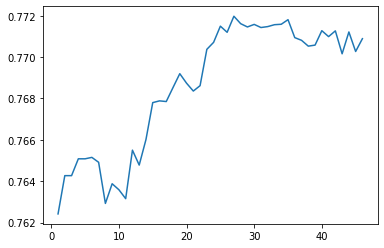

In [115]:
plt.plot(range(1,x.shape[1]+1),score_list)
plt.show()

In [118]:
np.max(score_list)

0.771972179650987

In [125]:
np.argmax(score_list) + 1

27

In [181]:
score_list.sort(reverse=False)
score_list

[0.7624169388444645,
 0.7629242362599223,
 0.7631539975326489,
 0.7635842965319647,
 0.7638753397060062,
 0.7642670186009831,
 0.7642670186009831,
 0.764777584384511,
 0.7649123295283414,
 0.7650807005099954,
 0.7650807005099954,
 0.7651496530710671,
 0.7654989265578686,
 0.7660139780098193,
 0.7677968060906906,
 0.767849283408633,
 0.7678815585433257,
 0.7683560972390194,
 0.7685269528474206,
 0.7686167829433075,
 0.7687357281955745,
 0.7691963846646435,
 0.7701573182279589,
 0.7702687012102266,
 0.7703726303122529,
 0.770527010677525,
 0.7705770033687204,
 0.7707105061991771,
 0.7708085739166286,
 0.7708875733744464,
 0.7709389167687726,
 0.7709876671465943,
 0.771196442494748,
 0.7712128093481196,
 0.7712653950558195,
 0.771273632677384,
 0.7714267707292827,
 0.7714539682207234,
 0.7714716857772261,
 0.7714925633120414,
 0.7715634335380521,
 0.771577991116242,
 0.7715843110728675,
 0.7716134262292474,
 0.7718064016858376,
 0.771972179650987]

In [127]:
lr = LogisticRegression()

In [128]:
rfe=RFE(lr,n_features_to_select=27) # we will KnoW worst feature
rfe.fit(x,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=27, step=1, verbose=0)

In [130]:
rf = pd.DataFrame(rfe.ranking_,index=x.columns,columns=["select"])
rf

,select
time_in_hospital,19
num_lab_procedures,17
num_procedures,11
num_medications,15
number_outpatient,7
number_emergency,9
number_inpatient,1
number_diagnoses,1
race_Asian,8
race_Caucasian,1


In [139]:
rf = rf[rf['select']==1]
rf

,select
number_inpatient,1
number_diagnoses,1
race_Caucasian,1
race_Hispanic,1
race_Other,1
age_adult,1
age_child,1
diag_1_Diabetes,1
diag_1_Digestive,1
diag_1_Genitourinary,1


In [140]:
col_sel_2 = set(rf.index)
col_sel_2

{'age_adult',
 'age_child',
 'change_No',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Genitourinary',
 'diag_1_Injury',
 'diag_1_Muscoloskeletal',
 'diag_1_Others',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_2_Injury',
 'diag_2_Muscoloskeletal',
 'diag_2_Neoplasms',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Injury',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'number_diagnoses',
 'number_inpatient',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'readmitted_Yes'}

In [141]:
len(col_sel_2)

27

# full grown DT

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [183]:
dtf =pd.DataFrame({'Features':x.columns,'importance':dt.feature_importances_*100}).sort_values('importance',ascending=False)
dtf = dtf.reset_index().drop('index',axis=1)
dtf

,Features,importance
0,change_No,32.030664
1,num_lab_procedures,12.189743
2,num_medications,10.602731
3,time_in_hospital,6.885890
4,num_procedures,4.189419
5,number_diagnoses,2.883793
6,number_inpatient,2.294157
7,readmitted_Yes,1.802114
8,gender_Male,1.770836
9,number_outpatient,1.751219


In [189]:
dtf['importance'][:30].sum() # ~ 95%

95.38451337328122

In [190]:
col_sel_3 = set(dtf.iloc[:30,]['Features'])
col_sel_3

{'A1Cresult_Norm',
 'A1Cresult_Not Normal',
 'age_adult',
 'change_No',
 'diag_1_Diabetes',
 'diag_1_Genitourinary',
 'diag_1_Injury',
 'diag_1_Others',
 'diag_1_Respiratory',
 'diag_2_Diabetes',
 'diag_2_Digestive',
 'diag_2_Genitourinary',
 'diag_2_Others',
 'diag_2_Respiratory',
 'diag_3_Diabetes',
 'diag_3_Digestive',
 'diag_3_Genitourinary',
 'diag_3_Others',
 'diag_3_Respiratory',
 'gender_Male',
 'num_lab_procedures',
 'num_medications',
 'num_procedures',
 'number_diagnoses',
 'number_emergency',
 'number_inpatient',
 'number_outpatient',
 'race_Caucasian',
 'readmitted_Yes',
 'time_in_hospital'}

In [193]:
col_sel_2-col_sel_3

{'age_child',
 'diag_1_Digestive',
 'diag_1_Muscoloskeletal',
 'diag_2_Injury',
 'diag_2_Muscoloskeletal',
 'diag_2_Neoplasms',
 'diag_3_Injury',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'race_Hispanic',
 'race_Other'}

In [195]:
a=col_sel_1.intersection(col_sel_2-col_sel_3)
a

{'age_child',
 'diag_1_Digestive',
 'diag_1_Muscoloskeletal',
 'diag_3_Muscoloskeletal',
 'max_glu_serum_None',
 'race_Hispanic',
 'race_Other'}

In [197]:
final_selection = list(col_sel_3)
for i in a:
  final_selection.append(i)

In [198]:
final_selection

['age_adult',
 'diag_3_Diabetes',
 'num_lab_procedures',
 'number_emergency',
 'diag_2_Respiratory',
 'diag_3_Others',
 'num_procedures',
 'readmitted_Yes',
 'diag_3_Digestive',
 'diag_3_Respiratory',
 'change_No',
 'diag_1_Injury',
 'diag_2_Diabetes',
 'diag_1_Others',
 'diag_2_Digestive',
 'gender_Male',
 'race_Caucasian',
 'diag_3_Genitourinary',
 'diag_1_Respiratory',
 'diag_1_Diabetes',
 'A1Cresult_Norm',
 'number_inpatient',
 'time_in_hospital',
 'diag_1_Genitourinary',
 'num_medications',
 'A1Cresult_Not Normal',
 'diag_2_Others',
 'number_diagnoses',
 'diag_2_Genitourinary',
 'number_outpatient',
 'diag_3_Muscoloskeletal',
 'diag_1_Muscoloskeletal',
 'age_child',
 'race_Other',
 'race_Hispanic',
 'max_glu_serum_None',
 'diag_1_Digestive']

In [199]:
len(final_selection)

37

In [201]:
x[final_selection][:4]

,age_adult,diag_3_Diabetes,num_lab_procedures,number_emergency,diag_2_Respiratory,diag_3_Others,num_procedures,readmitted_Yes,diag_3_Digestive,diag_3_Respiratory,change_No,diag_1_Injury,diag_2_Diabetes,diag_1_Others,diag_2_Digestive,gender_Male,race_Caucasian,diag_3_Genitourinary,diag_1_Respiratory,diag_1_Diabetes,A1Cresult_Norm,number_inpatient,time_in_hospital,diag_1_Genitourinary,num_medications,A1Cresult_Not Normal,diag_2_Others,number_diagnoses,diag_2_Genitourinary,number_outpatient,diag_3_Muscoloskeletal,diag_1_Muscoloskeletal,age_child,race_Other,race_Hispanic,max_glu_serum_None,diag_1_Digestive
1,0,0,59,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3,0,18,0,0,9,0,0,0,0,1,0,0,1,0
3,1,0,44,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,2,0,16,0,0,7,0,0,0,0,0,0,0,1,0
4,1,1,51,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,8,0,0,5,0,0,0,0,0,0,0,1,0
5,1,1,31,0,0,0,6,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,3,0,16,0,0,9,0,0,0,0,0,0,0,1,0


In [204]:
x1 = x[final_selection]

In [205]:
x1.to_csv('x1.csv')
y.to_csv('y1.csv')

# We will modify if needed